# Определение перспективного тарифа для телеком-компании


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Открытие файлов и изучение общей информации

In [4]:
import pandas as pd #импорт библиотек
import math 
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
import seaborn as sns
from scipy import stats as st

In [5]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [47]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Таблица calls (информация о звонках):**
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [48]:
users.head()

,user_id,age,churn_date,city,reg_date,tariff,month,name
0,1000,52,NaN,Краснодар,2018-05-25,ultra,5,Рафаил Верещагин
1,1001,41,NaN,Москва,2018-11-01,smart,11,Иван Ежов
2,1002,59,NaN,Стерлитамак,2018-06-17,smart,6,Евгений Абрамович
3,1003,23,NaN,Москва,2018-08-17,ultra,8,Белла Белякова
4,1004,68,NaN,Новокузнецк,2018-05-14,ultra,5,Татьяна Авдеенко


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Таблица users (информация о пользователях):** 
* user_id — уникальный идентификатор пользователя 
* first_name — имя пользователя 
* last_name — фамилия пользователя 
* age — возраст пользователя (годы) 
* reg_date — дата подключения тарифа (день, месяц, год) 
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) 
* city — город проживания пользователя tarif — название тарифного плана 

In [49]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Таблица messages (информация о сообщениях):** 
* id — уникальный номер сообщения 
* message_date — дата сообщения 
* user_id — идентификатор пользователя, отправившего сообщение 

In [50]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Таблица internet (информация об интернет-сессиях):**  
* id — уникальный номер сессии 
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах) 
* session_date — дата интернет-сессии 
* user_id — идентификатор пользователя

In [15]:
tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Таблица tariffs (информация о тарифах):** 
* tariff_name — название тарифа 
* rub_monthly_fee — ежемесячная абонентская плата в рублях 
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату 
* messages_included — количество сообщений в месяц, включённых в абонентскую плату 
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) 
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата) 
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета 
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод:
Изучив таблицы, содержимое и типы данных необходимо подготовить данные к дальнейшей работе, а именно:
* все колонки с датами переведем в нужный формат;
* округлим все значения, как того требуют условия (в большую сторону);
* для решения поставленных задач добавим колонку *Месяц*.

## Подготовка данных

### Предподготовка таблицы *Calls*

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls['month'] = calls['call_date'].dt.month

In [18]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [19]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 7.0+ MB


*Найдем количество звонков и минут в месяц для каждого пользователя*

In [20]:
calls_and_min_on_month = calls.pivot_table(index=['user_id','month'], values=['duration'] , aggfunc=['sum','count'])
calls_and_min_on_month.columns = ['minutes', 'calls']
calls_and_min_on_month

minutes  calls
user_id month                
1000    5          159     22
        6          172     43
        7          340     47
        8          408     52
        9          466     58
...                ...    ...
1498    10         247     41
1499    9           70      9
        10         449     68
        11         612     74
        12         492     69

[3174 rows x 2 columns]

### Предподготовка таблицы *Users*

In [21]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['month'] = users['reg_date'].dt.month
users['name'] = users['first_name'] + ' ' + users['last_name']
users = users.drop(['first_name', 'last_name'], axis=1)

In [22]:
users.head()

,user_id,age,churn_date,city,reg_date,tariff,month,name
0,1000,52,NaN,Краснодар,2018-05-25,ultra,5,Рафаил Верещагин
1,1001,41,NaN,Москва,2018-11-01,smart,11,Иван Ежов
2,1002,59,NaN,Стерлитамак,2018-06-17,smart,6,Евгений Абрамович
3,1003,23,NaN,Москва,2018-08-17,ultra,8,Белла Белякова
4,1004,68,NaN,Новокузнецк,2018-05-14,ultra,5,Татьяна Авдеенко


### Предподготовка таблицы *Messages*

In [23]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month

In [24]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


*Найдем количество сообщений в месяц*

In [25]:
messages_in_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_in_month.columns = ['messages']
messages_in_month

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

### Предподготовка таблицы *Internet*

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month

In [27]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


*Найдем объем потраченных в месяц мегабайт.*

In [28]:
mb_in_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
mb_in_month

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

### Выручка по месяцам

Для того чтобы найти помесячную выручку объединим таблицы. 

In [29]:
data = calls_and_min_on_month.merge(messages_in_month, on=['user_id', 'month'], how='outer')
data = data.merge(mb_in_month, on=['user_id', 'month'], how='outer')
data = data.reset_index(drop=False) 
data = data.merge(users[['user_id', 'tariff']], on=['user_id'], how='left')

In [30]:
data

,user_id,month,minutes,calls,messages,mb_used,tariff
0,1000,5,159.0,22.0,22.0,2253.49,ultra
1,1000,6,172.0,43.0,60.0,23233.77,ultra
2,1000,7,340.0,47.0,75.0,14003.64,ultra
3,1000,8,408.0,52.0,81.0,14055.93,ultra
4,1000,9,466.0,58.0,57.0,14568.91,ultra
...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,smart
3210,1489,10,NaN,NaN,21.0,19559.44,smart
3211,1489,11,NaN,NaN,20.0,17491.56,smart
3212,1489,12,NaN,NaN,35.0,17322.51,smart


Заполним обнаруженные пропуски нулями, для этого посмотрим в каких именно столбцах они встречаются и насколько их много.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   minutes   3174 non-null   float64
 3   calls     3174 non-null   float64
 4   messages  2717 non-null   float64
 5   mb_used   3203 non-null   float64
 6   tariff    3214 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 200.9+ KB


Также мне не нравится что некоторые столбцы стали типом *float*, исправим.

In [32]:
data['minutes'] = (data['minutes'].fillna(value=0)).astype('int')
data['calls'] = (data['calls'].fillna(value=0)).astype('int')
data['messages'] = (data['messages'].fillna(value=0)).astype('int')

In [33]:
data

,user_id,month,minutes,calls,messages,mb_used,tariff
0,1000,5,159,22,22,2253.49,ultra
1,1000,6,172,43,60,23233.77,ultra
2,1000,7,340,47,75,14003.64,ultra
3,1000,8,408,52,81,14055.93,ultra
4,1000,9,466,58,57,14568.91,ultra
...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17206.30,smart
3210,1489,10,0,0,21,19559.44,smart
3211,1489,11,0,0,20,17491.56,smart
3212,1489,12,0,0,35,17322.51,smart


In [34]:
def profit(row):
    minutes = row['minutes']
    calls = row['calls']
    messages = row['messages']
    mb = row['mb_used']
    tariff = row['tariff']
    
    if tariff == 'smart':
        overspend_minutes = minutes - tariffs.loc[0, 'minutes_included'] 
        overspend_messages = messages - tariffs.loc[0, 'messages_included']
        overspend_mb = mb - tariffs.loc[0, 'mb_per_month_included']
        
        if overspend_minutes < 0:
            overspend_minutes = 0
        if overspend_messages < 0:
            overspend_messages = 0
        if overspend_mb < 0:
            overspend_mb = 0
            
        return (overspend_minutes * tariffs.loc[0, 'rub_per_minute'] +
            overspend_messages * tariffs.loc[0, 'rub_per_message'] + 
            np.ceil(overspend_mb / 1024) * tariffs.loc[0, 'rub_per_gb'] + 
             tariffs.loc[0, 'rub_monthly_fee'])
    else: 
        overspend_minutes = minutes - tariffs.loc[1, 'minutes_included'] 
        overspend_messages = messages - tariffs.loc[1, 'messages_included']
        overspend_mb = mb - tariffs.loc[1, 'mb_per_month_included']
        
        if overspend_minutes < 0:
            overspend_minutes = 0
        if overspend_messages < 0:
            overspend_messages = 0
        if overspend_mb < 0:
            overspend_mb = 0
            
        return (overspend_minutes * tariffs.loc[1, 'rub_per_minute'] +
            overspend_messages * tariffs.loc[1, 'rub_per_message'] + 
            np.ceil(overspend_mb / 1024) * tariffs.loc[1, 'rub_per_gb'] + 
             tariffs.loc[1, 'rub_monthly_fee'])
data['profits'] = data.apply(profit, axis=1)

In [35]:
data

,user_id,month,minutes,calls,messages,mb_used,tariff,profits
0,1000,5,159,22,22,2253.49,ultra,1950.0
1,1000,6,172,43,60,23233.77,ultra,1950.0
2,1000,7,340,47,75,14003.64,ultra,1950.0
3,1000,8,408,52,81,14055.93,ultra,1950.0
4,1000,9,466,58,57,14568.91,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17206.30,smart,950.0
3210,1489,10,0,0,21,19559.44,smart,1550.0
3211,1489,11,0,0,20,17491.56,smart,1150.0
3212,1489,12,0,0,35,17322.51,smart,950.0


## Анализ данных

Добавлю колонку с процентным превышением по оплате тарифа.

In [36]:
def excess(row):
    profits = row['profits']
    tariff = row['tariff']
    
    if tariff == 'smart':
        return (profits/tariffs.loc[0, 'rub_monthly_fee'] * 100 - 100)
          
    else:
            
        return (profits/tariffs.loc[1, 'rub_monthly_fee'] * 100 - 100)
    
data['percentage_excess'] = data.apply(excess, axis=1)

Посчитаем среднее количество, дисперсию, стандартное отклонение.

In [37]:
var_std = (data.pivot_table(index = 'tariff', values = ['minutes',
                                                        'messages',
                                                        'mb_used','profits', 'percentage_excess'], aggfunc = [np.mean, np.var, np.std])).astype('int')
var_std

mean                                                  var           \
       mb_used messages minutes percentage_excess profits   mb_used messages   
tariff                                                                         
smart    16215       33     417               134    1290  34359951      796   
ultra    19668       49     526                 6    2071  98864248     2285   

                                             std                   \
       minutes percentage_excess profits mb_used messages minutes   
tariff                                                              
smart    36219             22143  669840    5861       28     190   
ultra   100873               375  142819    9943       47     317   

                                  
       percentage_excess profits  
tariff                            
smart                148     818  
ultra                 19     377

Построю гистограммы:

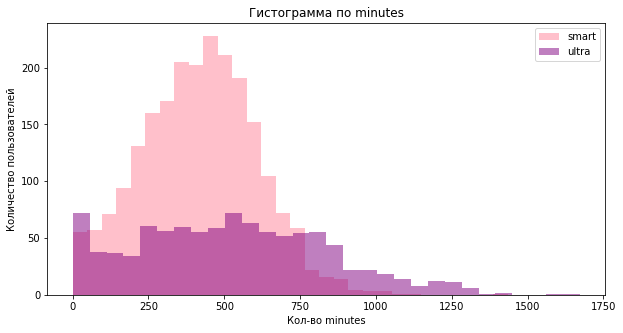

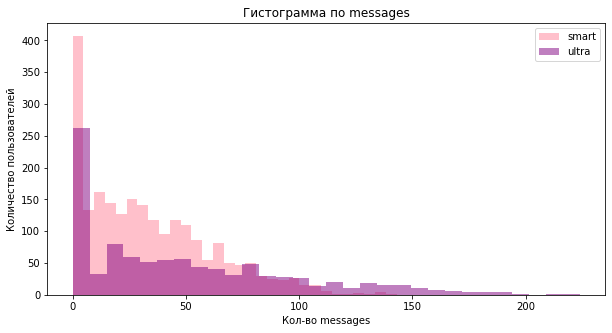

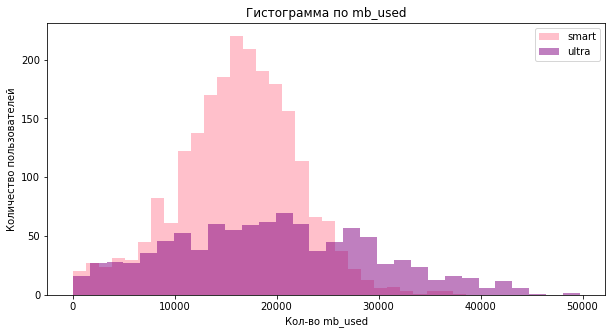

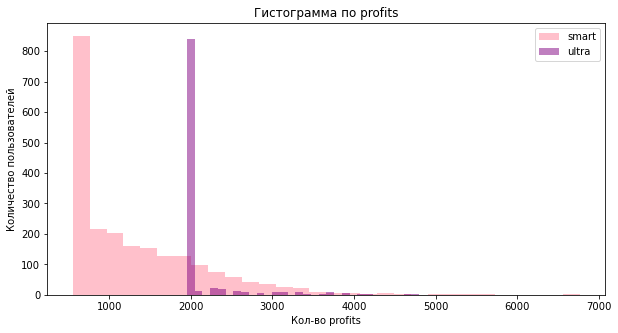

In [38]:
for column in ['minutes','messages','mb_used', 'profits']:
    data.loc[data.loc[:,'tariff'] == 'smart'][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            color = 'pink',
                                                                            label = 'smart', figsize = (10,5)
                                                                           )
    data.loc[data.loc[:,'tariff'] == "ultra"][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            color = 'purple',
                                                                            alpha = 0.5,
                                                                            label = 'ultra',figsize = (10,5)
                                                                           )
    plt.title(f"Гистограмма по {column}")
    plt.xlabel(f"Кол-во {column}")
    plt.ylabel('Количество пользователей')
    plt.legend()
    plt.show()

### Вывод: 
Судя по полученной сводной таблице и гистограммам пользователи тарифа ultra общаются больше и больше тратят смс и гб интернета, но они и платят больше почти в 4 раза. 

Дисперсия для тарифа Smart в колонке с полученной выручкой намного больше, как и стандартное отклонение. Такие показатели свидельствуют о том, что пользователям Smart'а не хватает включенных в пакет минут, гб и тд и они обращаются к доп. пакетам чаще. 

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

* H0 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" равны.

* H1 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.

Критический уровень статистической значимости зададим 5%. 

In [39]:
smart = data.query("tariff == 'smart'")
ultra = data.query("tariff == 'ultra'")
results = st.ttest_ind(
    smart['profits'], 
    ultra['profits'],  nan_policy='omit')
alpha = 0.05  
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1384749020954829e-159
Отвергаем нулевую гипотезу


<a class="anchor" id="21-bullet">

In [40]:
st.ttest_ind(
    smart['profits'], 
    ultra['profits'], nan_policy='omit')

Ttest_indResult(statistic=-28.497932061121013, pvalue=2.1384749020954829e-159)

**Вывод:**


Отвергая нулевую гипотезу, мы подтверждаем первую. Средняя выручка двух тарифов действительно отличается. 


###  Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

* H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

* H1 — средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

Критический уровень статистической значимости 5%.

In [41]:
data = data.merge(users [['user_id', 'city']], on='user_id', how='inner')
data

,user_id,month,minutes,calls,messages,mb_used,tariff,profits,percentage_excess,city
0,1000,5,159,22,22,2253.49,ultra,1950.0,0.000000,Краснодар
1,1000,6,172,43,60,23233.77,ultra,1950.0,0.000000,Краснодар
2,1000,7,340,47,75,14003.64,ultra,1950.0,0.000000,Краснодар
3,1000,8,408,52,81,14055.93,ultra,1950.0,0.000000,Краснодар
4,1000,9,466,58,57,14568.91,ultra,1950.0,0.000000,Краснодар
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11050.56,smart,550.0,0.000000,Санкт-Петербург
3210,1489,9,0,0,32,17206.30,smart,950.0,72.727273,Санкт-Петербург
3211,1489,10,0,0,21,19559.44,smart,1550.0,181.818182,Санкт-Петербург
3212,1489,11,0,0,20,17491.56,smart,1150.0,109.090909,Санкт-Петербург


In [42]:
moscow = data.query('city == "Москва"')['profits']
regions = data.query('city != "Москва"')['profits']

In [43]:
alpha = 0.05 
results = st.ttest_ind(moscow, regions,  nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5215001521770526
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Нулевую гипотезу отвергнуть не получилось, следовательно пользователи живущие в Москве тратят на связь примерно столько же, сколько и пользователи регионов. 

## Какой тариф выгоднее?

Посчитаем сумму полученной выручки за весь период.

In [44]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [45]:
smart = data.query('tariff == "smart"')['profits']
smart.sum()

2874801.0

In [46]:
ultra = data.query('tariff == "ultra"')['profits']
ultra.sum()

2019600.0

## Общий вывод:

* По результатам анализа выручка от тарифа «Ультра» больше, чем от тарифа «Смарт». Пользователи "Смарт" тратят примерно 1300 рублей, а пользователи "Ультра" чуть больше своей абонентской платы - 2000 рублей.


* Доплат по тарифу «Ультра» очень мало. В тарифе «Смарт» часто доплачивают за дополнительные пакеты.


* Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах. 


* Тариф Ультра приносит оператору бОльшую выручку с 1 клиента. Но в целом бОльшую прибыль приносит тариф Смарт, но и самих клиентов Смарта больше 2 раза. 